# Predicting earning of a Store

https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor



## Exploring Data

In [10]:
df = pd.read_csv("/content/drive/MyDrive/store-sales/Stores.csv")

In [11]:
df.shape

(896, 5)

In [12]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [13]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [15]:
df.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

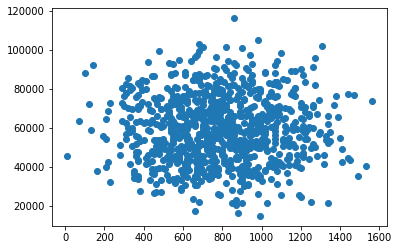

In [16]:
fig, ax = plt.subplots()

ax.scatter(df.Daily_Customer_Count, df.Store_Sales)

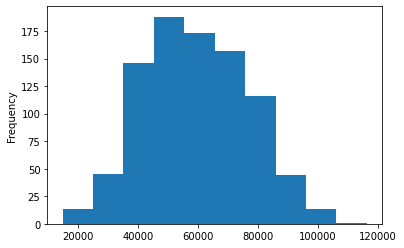

In [17]:
df.Store_Sales.plot.hist()

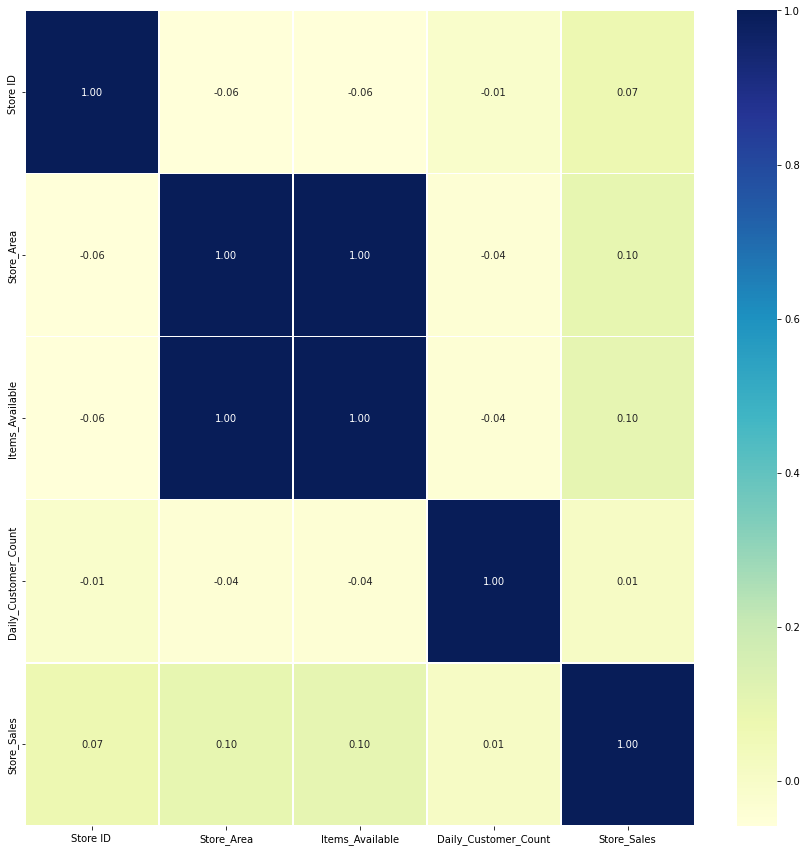

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix, annot= True, linewidths=0.5, fmt = ".2f",cmap="YlGnBu")

## Preparing training and test data

In [19]:
X = df.drop("Store_Sales", axis =1 )
y = df.Store_Sales

In [20]:
X.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,1,1659,1961,530
1,2,1461,1752,210
2,3,1340,1609,720
3,4,1451,1748,620
4,5,1770,2111,450


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((716, 4), (716,), (180, 4), (180,))

## Create and fit model

In [22]:
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "Ridge": Ridge(),
    "SVM": SVR(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor()
}



In [23]:
def fit_score_model(models, X_train, y_train, X_test, y_test):

  np.random.seed(3)
  model_scores = {}

  for name, model in models.items():

  
    model.fit(X_train, y_train,)
    model_scores[name] = model.score(X_test, y_test)

  return model_scores   


In [24]:
model_scores = fit_score_model(models = models, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

print(model_scores)

{'RandomForestRegressor': -0.042243865772022104, 'Ridge': 0.007883059119364821, 'SVM': 2.271603866443872e-05, 'LinearRegression': 0.007883064236266724, 'DecisionTreeRegressor': -0.7652427277199061}


Choosing Random Forest Regressor because of past experience

## Hyperparamter tuning with GridSearchCV

### Random Forest Regressor

In [25]:
np.random.seed(3)
rfr_params ={
    "bootstrap": [True],
    "max_depth": [80, 90,100, 110, None],
    "max_features": [2, "auto"],
    "min_samples_leaf": [1,2,3],
    "min_samples_split": [2,4,6]
}
rfr_model = GridSearchCV(RandomForestRegressor(), param_grid = rfr_params,verbose = True, cv=5)
rfr_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, None],
                         'max_features': [2, 'auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             verbose=True)

In [26]:
rfr_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [27]:
rfr_model.score(X_test, y_test)

-0.02373747057580733

### Ridge

In [28]:
rid_params = {
    "alpha": np.linspace(0,0.2, 21)
}


In [29]:
rid_model = GridSearchCV(Ridge(), param_grid = rid_params, cv=5, verbose = True)

rid_model.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])},
             verbose=True)

In [30]:
rid_model.best_params_

{'alpha': 0.2}

In [31]:
rid_model.score(X_test, y_test)

0.007883063212896224

In [32]:
df_temp = df.copy()

In [33]:
df_temp.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [34]:
df_temp.drop(df.columns[0], axis = 1, inplace = True)

In [35]:
df_temp.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [36]:
X = df_temp.drop("Store_Sales", axis = 1)
y = df.Store_Sales

In [37]:
X.head()

,Store_Area,Items_Available,Daily_Customer_Count
0,1659,1961,530
1,1461,1752,210
2,1340,1609,720
3,1451,1748,620
4,1770,2111,450


In [38]:
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size = 0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((806, 3), (806,), (90, 3), (90,))

In [39]:
model_scores_2 = fit_score_model(models = models , X_test = X_test, y_test = y_test, X_train=X_train, y_train = y_train)

model_scores_2


{'DecisionTreeRegressor': -0.6009052462427269,
 'LinearRegression': -0.004924462232105409,
 'RandomForestRegressor': -0.036555458544962116,
 'Ridge': -0.004924483198833984,
 'SVM': -0.000898748725036036}

In [40]:
rid_model = GridSearchCV(Ridge(), param_grid = rid_params, cv=5, verbose = True)

rid_model.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])},
             verbose=True)

In [41]:
rid_model.score(X_test, y_test)

-0.004924466425483498

Best models after removing the sales id column is Ridge

### Evaluating the model

In [42]:
X_test.shape

(90, 3)

In [47]:
np.random.seed(3)
rfr_params ={
    "bootstrap": [True],
    "max_depth": [80, 90,100, 110, None],
    "max_features": [2, "auto"],
    "min_samples_leaf": [1,2,3],
    "min_samples_split": [2,4,6]
}
rfr_model = GridSearchCV(RandomForestRegressor(), param_grid = rfr_params,verbose = True, cv=5)
rfr_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, None],
                         'max_features': [2, 'auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             verbose=True)

In [43]:
rfr_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [45]:



def show_scores(model):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {
      "Training MAE": mean_absolute_error(y_train,train_preds),
      "Test MAE": mean_absolute_error(y_test, test_preds),
      "Traing MSLE": mean_squared_log_error(y_train, train_preds),
      "Test MSLE": mean_squared_log_error(y_test, test_preds),
      "Training R^2": r2_score(y_train, train_preds),
      "Test R^2": r2_score(y_test, test_preds),

  }

  return scores

In [48]:
scores = show_scores(rfr_model)
scores

{'Test MAE': 14269.590159605827,
 'Test MSLE': 0.12791758769838582,
 'Test R^2': -0.026772502594532455,
 'Traing MSLE': 0.048186067619313114,
 'Training MAE': 9353.357539981042,
 'Training R^2': 0.5351428616363849}

In [49]:
dump(rfr_model,"/content/drive/MyDrive/store-sales/random_forrest_model.sav")

['/content/drive/MyDrive/store-sales/random_forrest_model.sav']

In [51]:
model = load("/content/drive/MyDrive/store-sales/random_forrest_model.sav")
model.score(X_train, y_train)

0.5351428616363849

In [53]:
dump(rid_model,"/content/drive/MyDrive/store-sales/ridge_model.sav")

['/content/drive/MyDrive/store-sales/ridge_model.sav']